In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata
import harmonypy as hm

In [2]:
sc.settings.set_figure_params(dpi=300,fontsize=10)

In [3]:
adata = sc.read_h5ad('/rds/general/user/snb20/projects/cardiac_single_cell_biology/live/Endothelial_datasets/data_analyzed/sanger_datasets/adult18_vas_20230622_SNB.h5ad')

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata

AnnData object with n_obs × n_vars = 74555 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'leiden_scVI', 'organ_uni', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'numbering', 'ann_ec_2', 'scoring_cc_s', 'scoring_cc_m', 'scoring_cc', 'score_s_genes', 'score_g2m_genes', 'score_angio_genes', 'score_EMT_genes', 'score_MET_genes', 'score_stress_genes', 'ann_ec_av', 'ann_ec_size', 'ann_ec_cap', 'ann_ec_final', 'test', 'ann_vas_1', 'published_annotation_skin', 'int_ext', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_vo

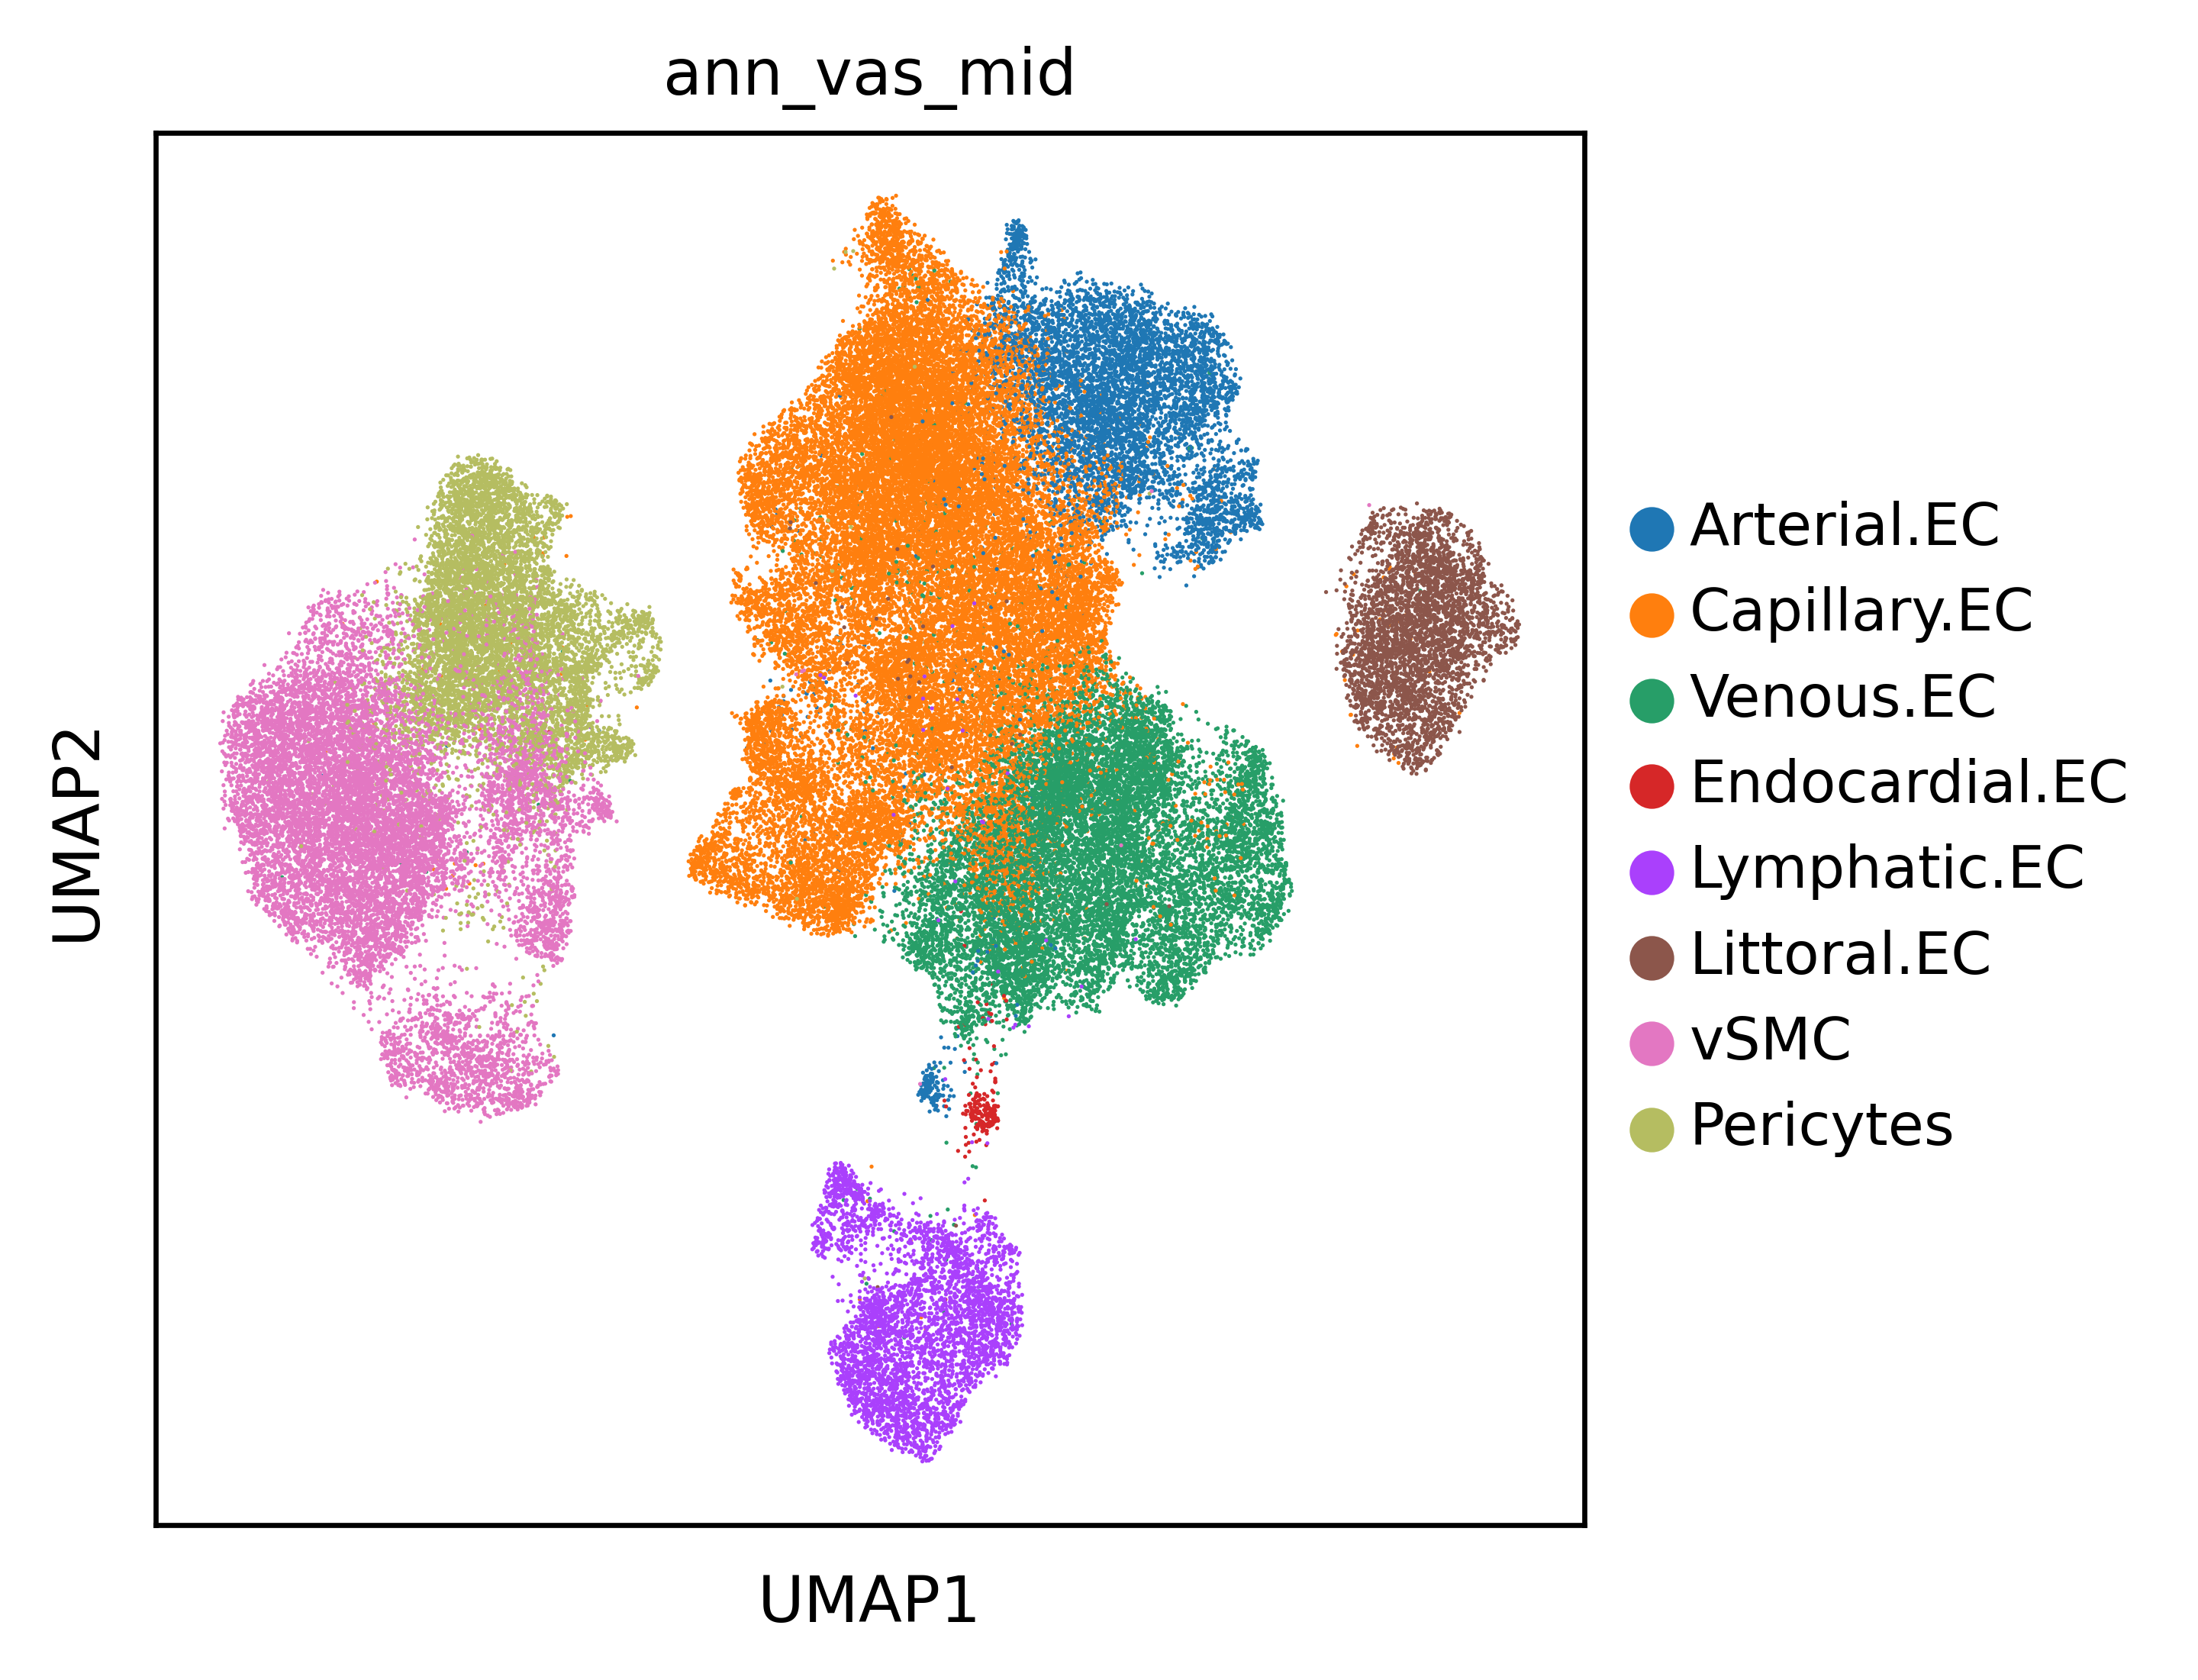

In [5]:
sc.pl.umap(adata, color = 'ann_vas_mid')

In [15]:
#adata.obs['ann_vas_mid'] = adata.obs['ann_vas_mid'].str.replace('vascular.smooth.muscle','vSMC')

/var/tmp/pbs.8285326.pbs/ipykernel_893441/487600491.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  adata.obs['ann_vas_mid'] = adata.obs['ann_vas_mid'].str.replace('vascular.smooth.muscle','vSMC')


In [6]:
adata_BEC = adata[adata.obs['ann_vas_broad'].isin(["BEC"])].copy()

In [8]:
adata_BEC

AnnData object with n_obs × n_vars = 46956 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'leiden_scVI', 'organ_uni', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'numbering', 'ann_ec_2', 'scoring_cc_s', 'scoring_cc_m', 'scoring_cc', 'score_s_genes', 'score_g2m_genes', 'score_angio_genes', 'score_EMT_genes', 'score_MET_genes', 'score_stress_genes', 'ann_ec_av', 'ann_ec_size', 'ann_ec_cap', 'ann_ec_final', 'test', 'ann_vas_1', 'published_annotation_skin', 'int_ext', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_vo

In [28]:
adata_BEC.obs.type_organ = (adata_BEC.obs["ann_vas_mid"]).astype(str) + "_" + (adata_BEC.obs["organ_uni"]).astype(str)

In [31]:
adata_BEC

AnnData object with n_obs × n_vars = 46956 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'leiden_scVI', 'organ_uni', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'numbering', 'ann_ec_2', 'scoring_cc_s', 'scoring_cc_m', 'scoring_cc', 'score_s_genes', 'score_g2m_genes', 'score_angio_genes', 'score_EMT_genes', 'score_MET_genes', 'score_stress_genes', 'ann_ec_av', 'ann_ec_size', 'ann_ec_cap', 'ann_ec_final', 'test', 'ann_vas_1', 'published_annotation_skin', 'int_ext', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_vo

In [32]:
anno1=adata_BEC.obs.ann_vas_mid.tolist()
anno1=pd.DataFrame(anno1,columns=["All"])


anno2=adata_BEC.obs.organ_uni.tolist()
anno2=pd.DataFrame(anno2,columns=["All"])

anno3=anno1+"_"+anno2
anno3=np.asarray(anno3)

adata_BEC.obs["anno3"]=anno3

In [33]:
adata_BEC.obs['anno3'] = adata_BEC.obs['anno3'].astype('category')

In [12]:
adata_BEC.obs.anno3.value_counts()

Capillary.EC_heart              9937
Capillary.EC_lung               4507
Venous.EC_muscle                2269
Capillary.EC_liver              2026
Capillary.EC_muscle             2022
Venous.EC_lung                  2018
Arterial.EC_heart               1991
Capillary.EC_uterus             1809
Capillary.EC_pancreas           1428
Capillary.EC_kidney             1421
Capillary.EC_adipose_tissue     1272
Venous.EC_lymph_node            1258
Capillary.EC_lymph_node         1066
Capillary.EC_decidua            1050
Venous.EC_trachea               1003
Venous.EC_heart                  939
Venous.EC_oesophagus             934
Venous.EC_thymus                 933
Arterial.EC_lung                 755
Capillary.EC_thymus              691
Venous.EC_small_intestine        683
Arterial.EC_spleen               660
Venous.EC_adipose_tissue         643
Arterial.EC_muscle               553
Venous.EC_large_vessels          488
Venous.EC_uterus                 468
Capillary.EC_trachea             429
A

In [34]:
sc.tl.dendrogram(adata_BEC, groupby = 'anno3')

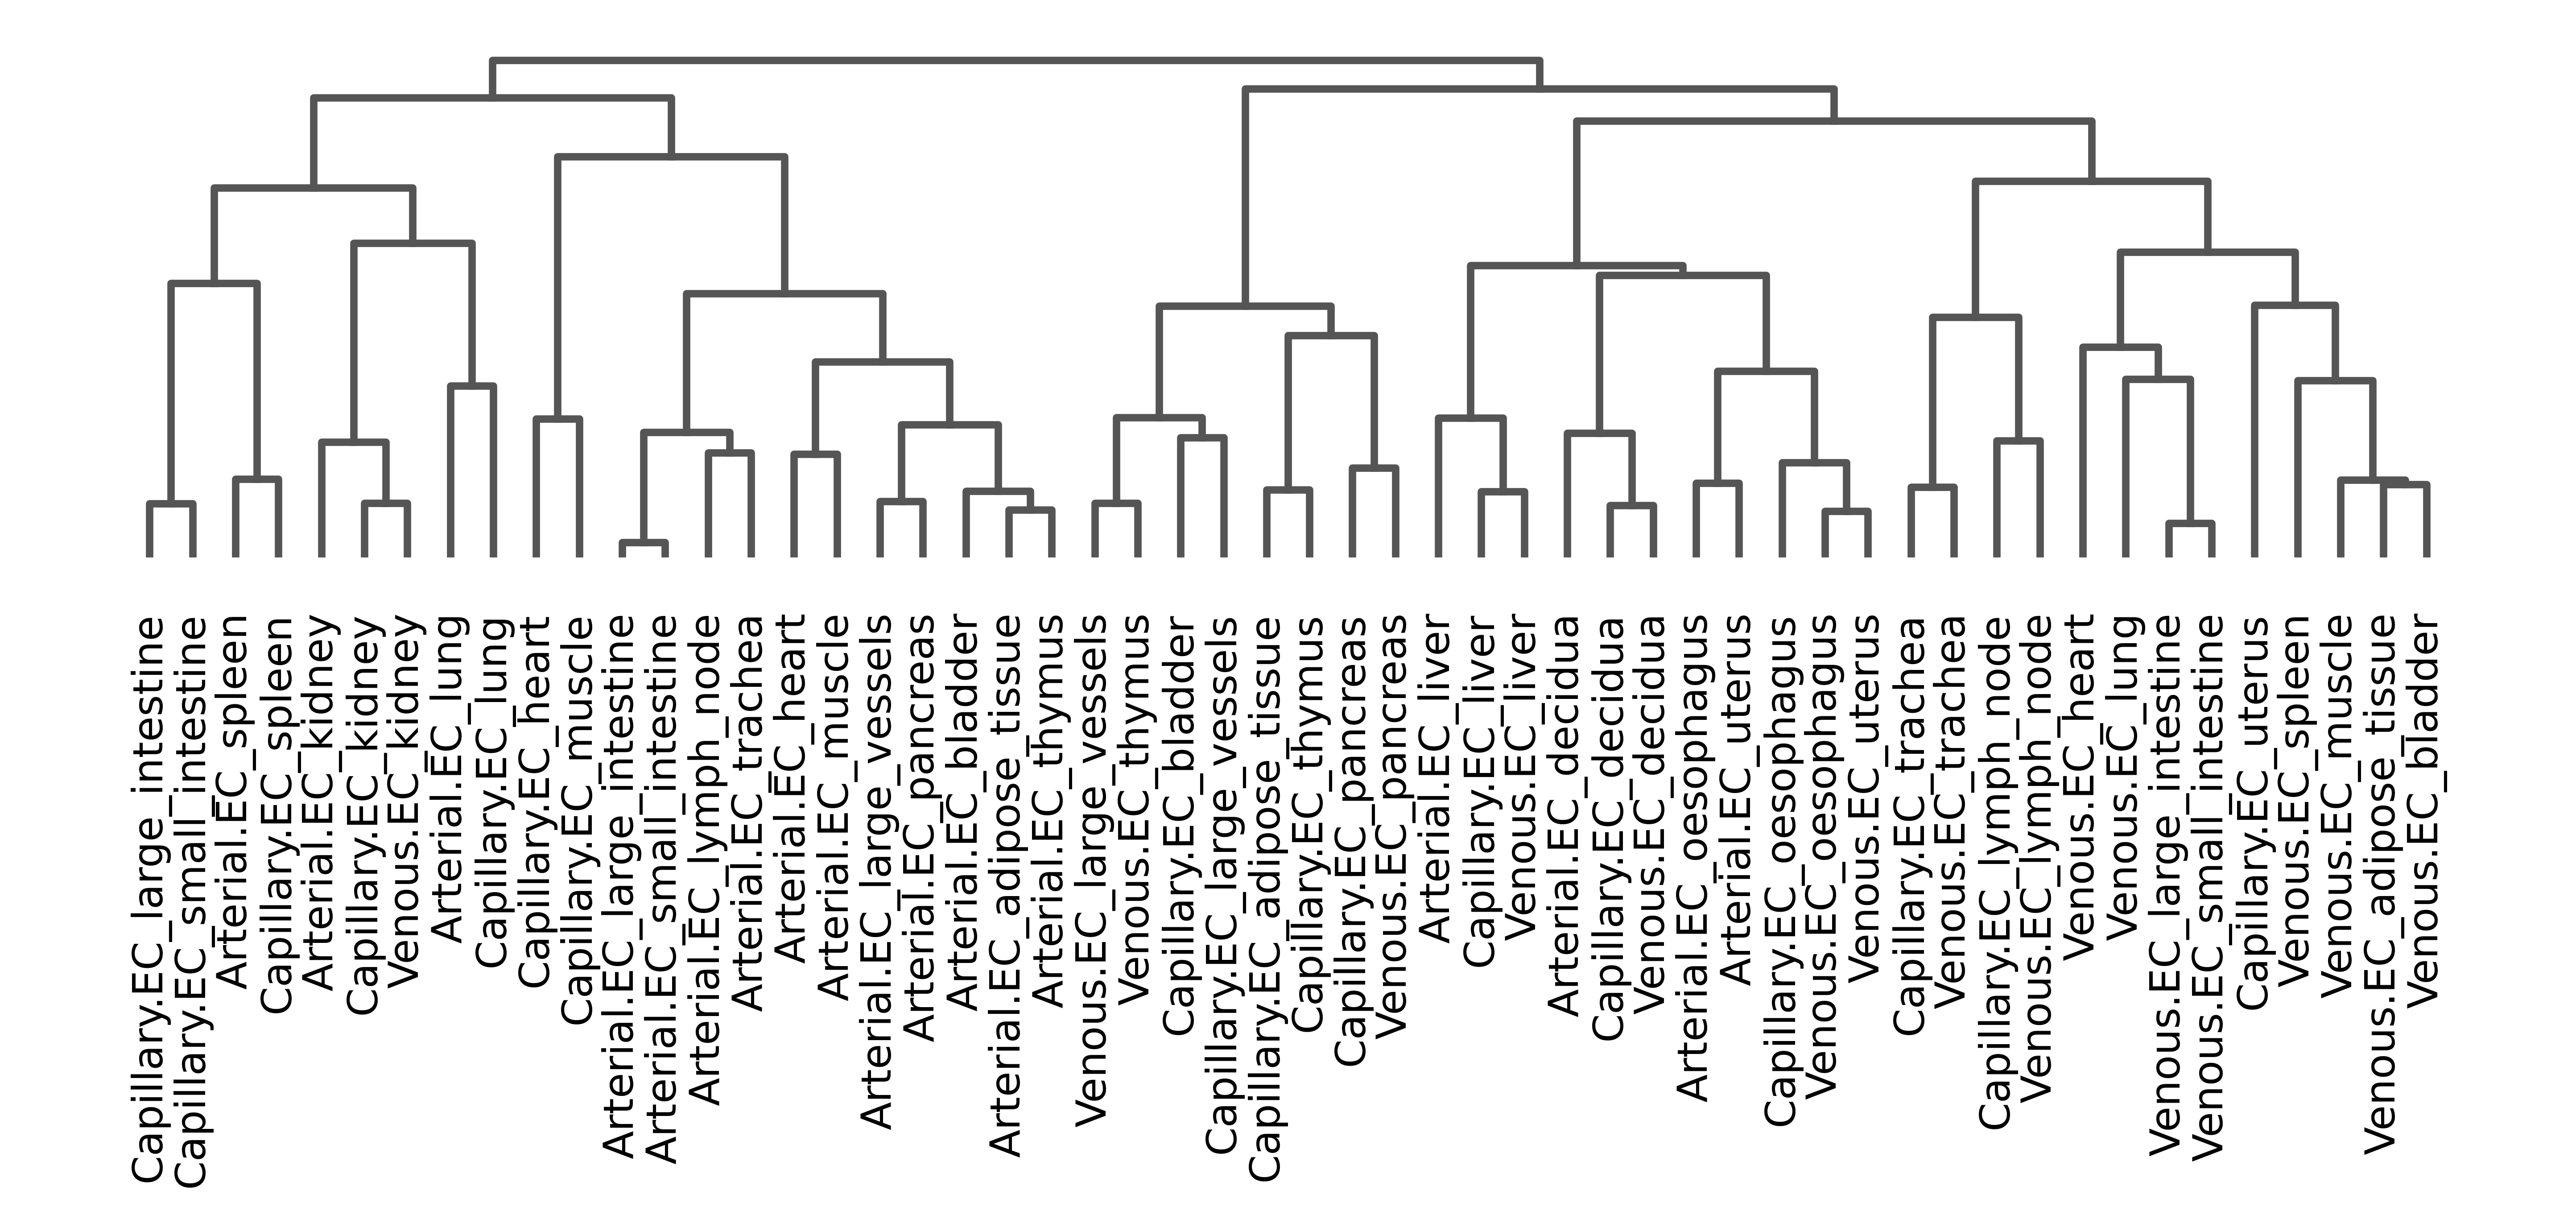

In [45]:
with plt.rc_context({"figure.figsize": (9,2), "figure.dpi": (400)}):
    sc.pl.dendrogram(adata_BEC, groupby = 'anno3', save='ec_anno3_dendrogram.pdf')
    #sc.pl.dendrogram(adata_BEC, groupby = 'anno3')

In [46]:
adata_mural = adata[adata.obs['ann_vas_broad'].isin(["Mural"])].copy()

In [48]:
anno1=adata_mural.obs.ann_vas_mid.tolist()
anno1=pd.DataFrame(anno1,columns=["All"])


anno2=adata_mural.obs.organ_uni.tolist()
anno2=pd.DataFrame(anno2,columns=["All"])

anno3=anno1+"_"+anno2
anno3=np.asarray(anno3)

adata_mural.obs["anno3"]=anno3

In [50]:
adata_mural.obs['anno3'] = adata_mural.obs['anno3'].astype('category')

In [51]:
adata_mural

AnnData object with n_obs × n_vars = 19915 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'leiden_scVI', 'organ_uni', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'numbering', 'ann_ec_2', 'scoring_cc_s', 'scoring_cc_m', 'scoring_cc', 'score_s_genes', 'score_g2m_genes', 'score_angio_genes', 'score_EMT_genes', 'score_MET_genes', 'score_stress_genes', 'ann_ec_av', 'ann_ec_size', 'ann_ec_cap', 'ann_ec_final', 'test', 'ann_vas_1', 'published_annotation_skin', 'int_ext', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_vo

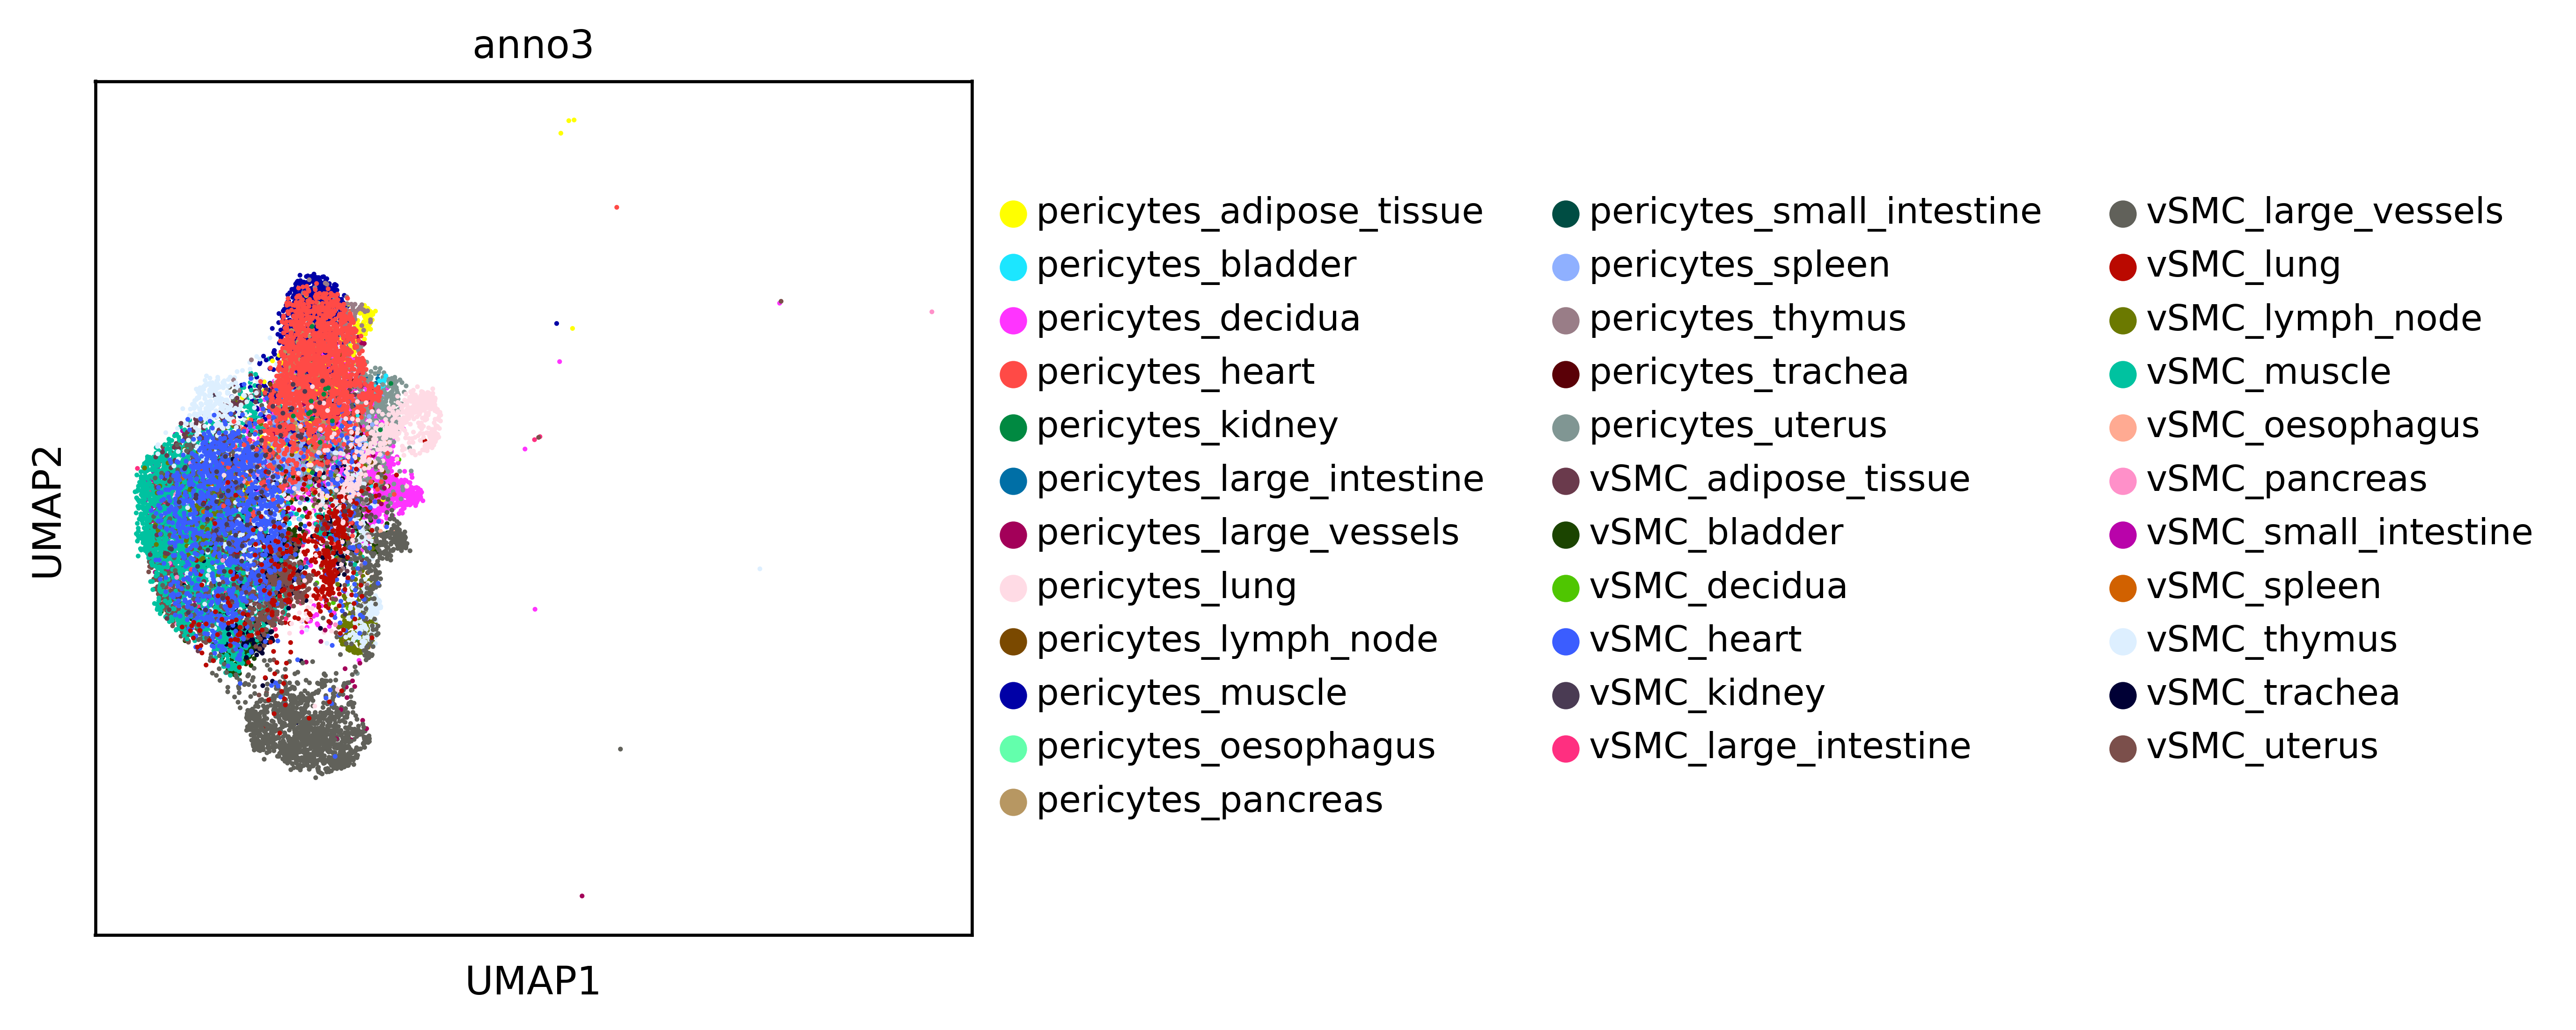

In [19]:
sc.pl.umap(adata_subset, color = 'anno3')

In [53]:
sc.tl.dendrogram(adata_mural, groupby = 'anno3')

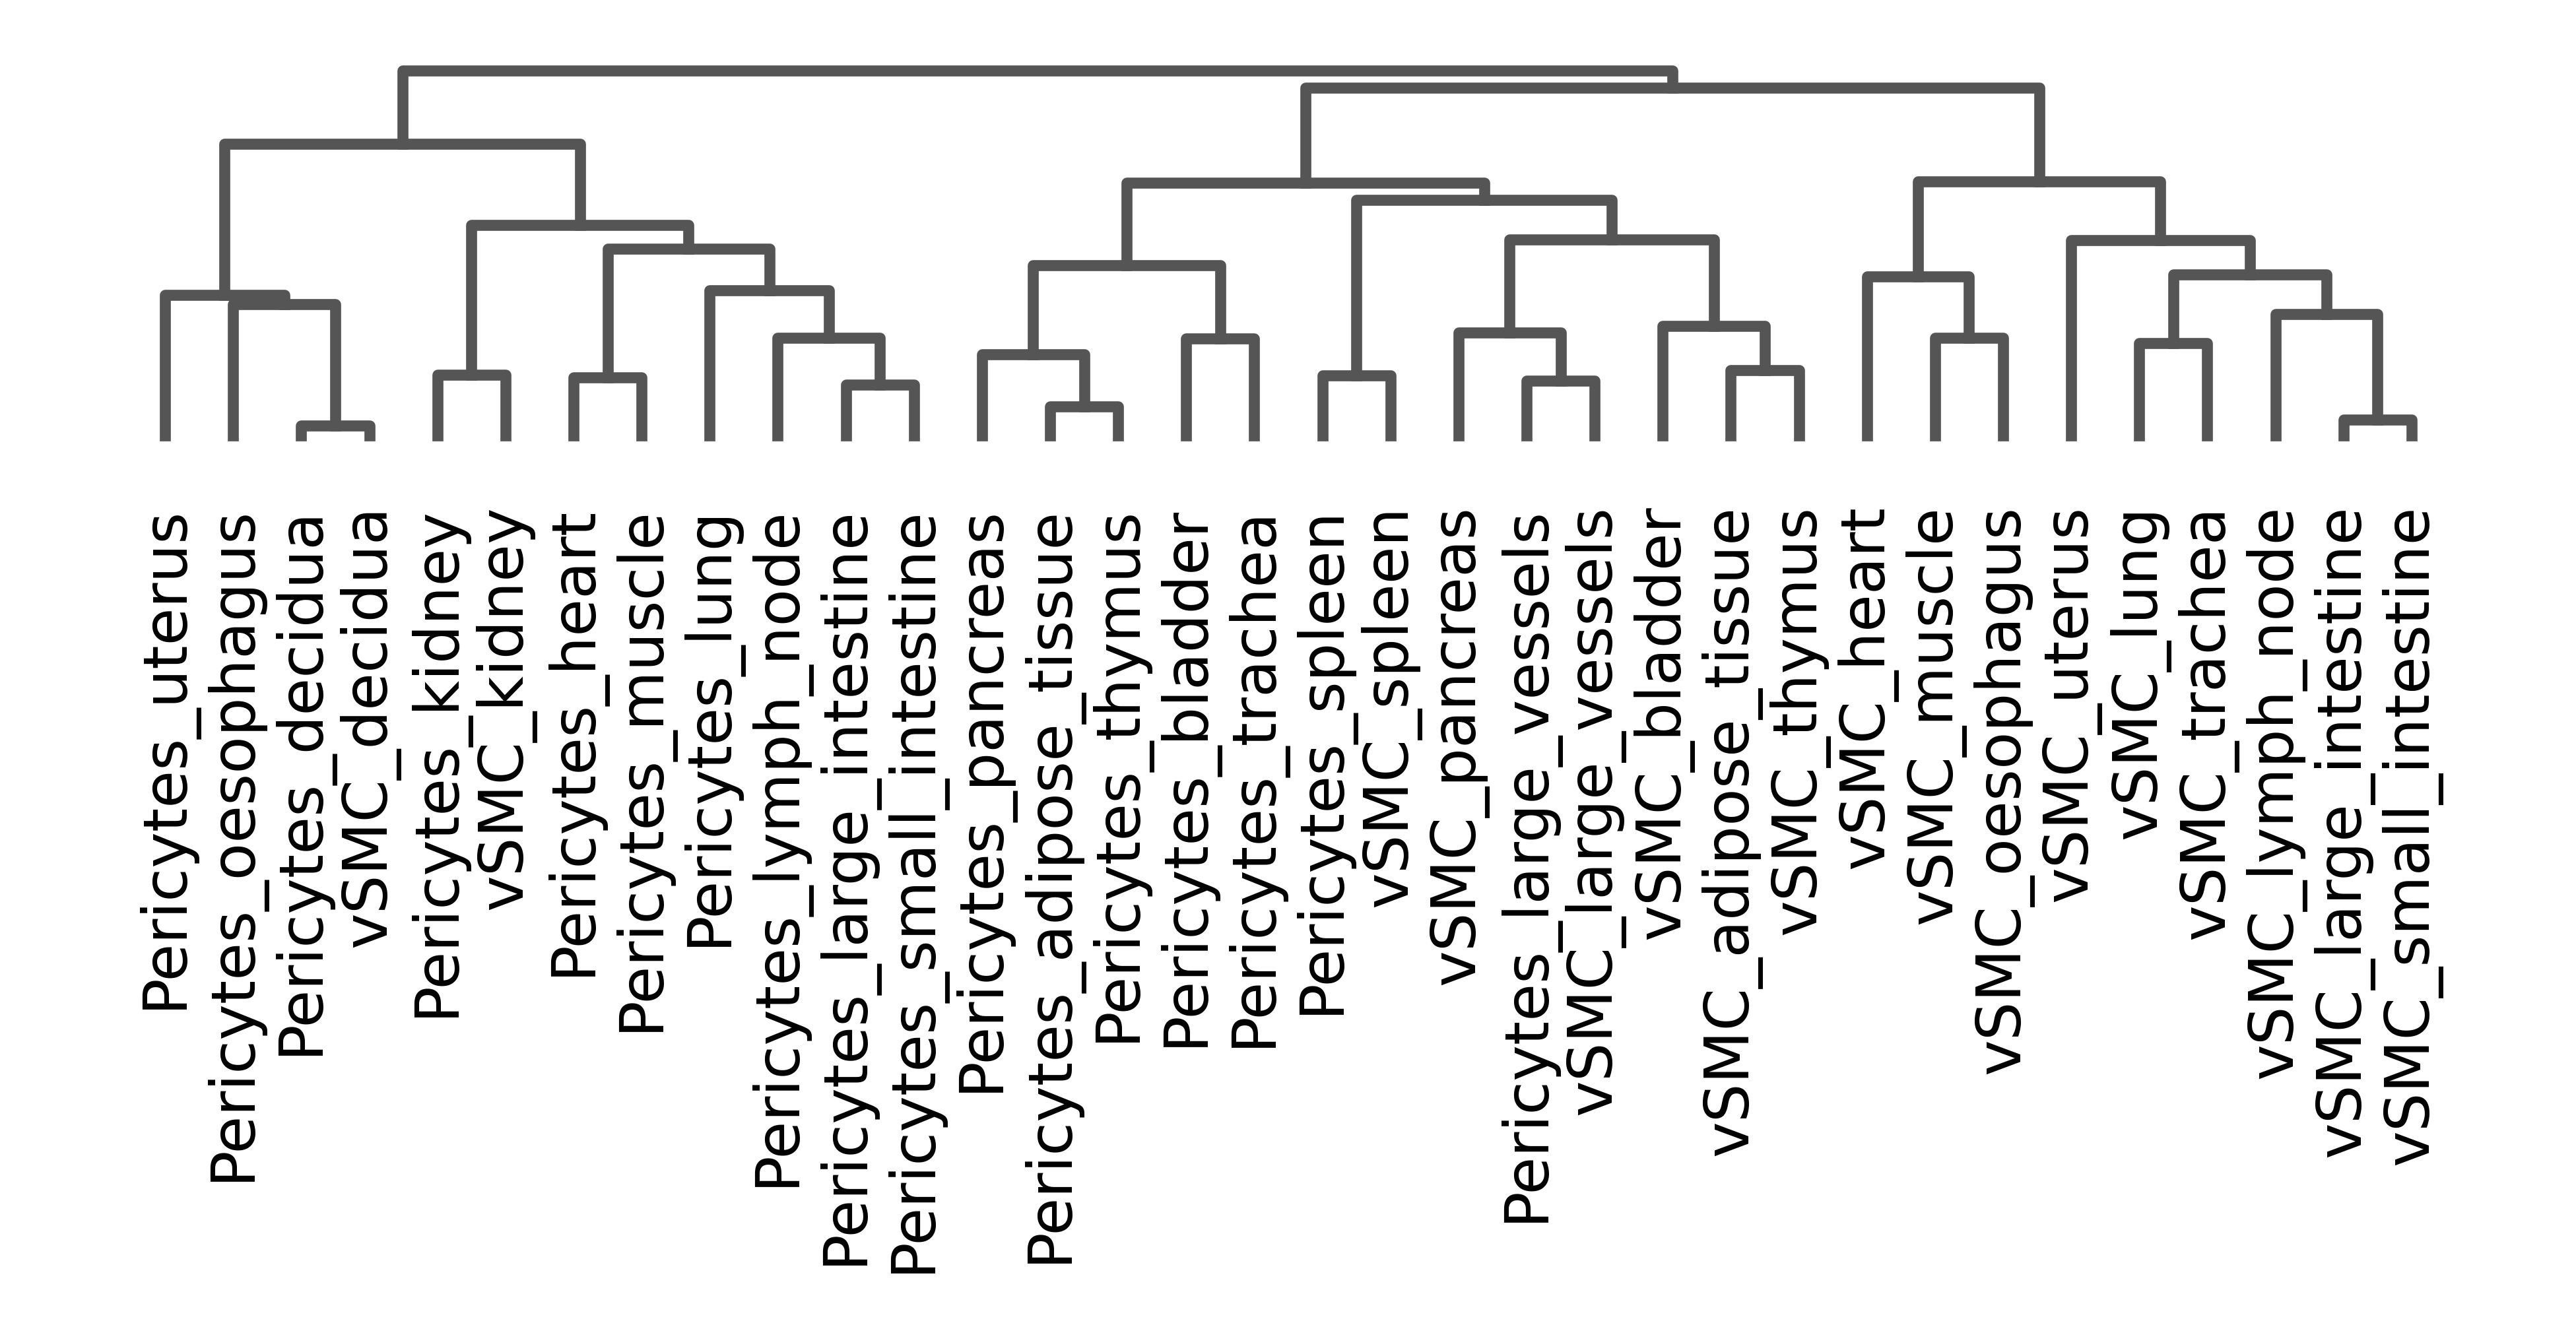

In [58]:
with plt.rc_context({"figure.figsize": (6,1), "figure.dpi": (400)}):
    sc.pl.dendrogram(adata_mural, groupby = 'anno3', save='mural_anno3_dendrogram.pdf')
    #sc.pl.dendrogram(adata_mural, groupby = 'anno3')